In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

In [32]:
spice_library = SpiceLibrary("libraries")
circuit = Circuit('18650 tester')
circuit.include(spice_library['2n2222a'])

Vbase1 = circuit.V('base1', 'n1', circuit.gnd, 1@u_V)
circuit.R('base1', 'n1', 'n4', 10@u_Ω)
circuit.BJT('b1', 'n2', 'n4', circuit.gnd, model='2n2222a')
circuit.R('dissipator', 'n2', 'n3', 4@u_Ω)
circuit.V('capa1', 'n3', circuit.gnd, 5@u_V)
print(circuit)

.title 18650 tester
.include /home/libraries/2N2222A.lib
Vbase1 n1 0 1V
Rbase1 n1 n4 10Ohm
Qb1 n2 n4 0 2n2222a
Rdissipator n2 n3 4Ohm
Vcapa1 n3 0 5V



In [33]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
period = 2
analysis = simulator.dc(Vbase1=slice(0, 5, .01))

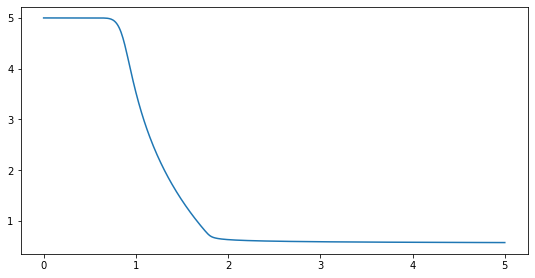

In [34]:
figure = plt.figure(1, (20, 10))
axe1 = plt.subplot(221)
axe1.plot(analysis.n1, analysis.n2)

In [35]:
#dir(circuit)

In [36]:
print(circuit)

.title 18650 tester
.include /home/libraries/2N2222A.lib
Vbase1 n1 0 1V
Rbase1 n1 n4 10Ohm
Qb1 n2 n4 0 2n2222a
Rdissipator n2 n3 4Ohm
Vcapa1 n3 0 5V



In [37]:
import lcapy

In [76]:
str_circuit = """
Vbase1 n1 0_n1 1; down
Rbase1 n1 n4 10; right
Qb1 n2 n4 0; down
Rdissipator n2 n3 4; up
Vcapa1 n3 0_n3 5; down
W 0 0_n3; right
W 0 0_n1; left
"""
cct = lcapy.Circuit(str_circuit)


In [79]:
cct.draw('test-circuit.png')

In [83]:
netlist = """
V1 1 0 step; down
R1 1 2; left=2, i=I_1, v=V_{R_1}
R2 1 3; right=2, i=I_2, v=V_{R_2}
L1 2 0_1; down=2, i=I_1, v=V_{L_1}
L2 3 0_3; down=2, i=I_2, v=V_{L_2}
W 0 0_3; right
W 0 0_1; left
"""
cct = lcapy.Circuit(netlist)
cct.draw('circuit.pdf')